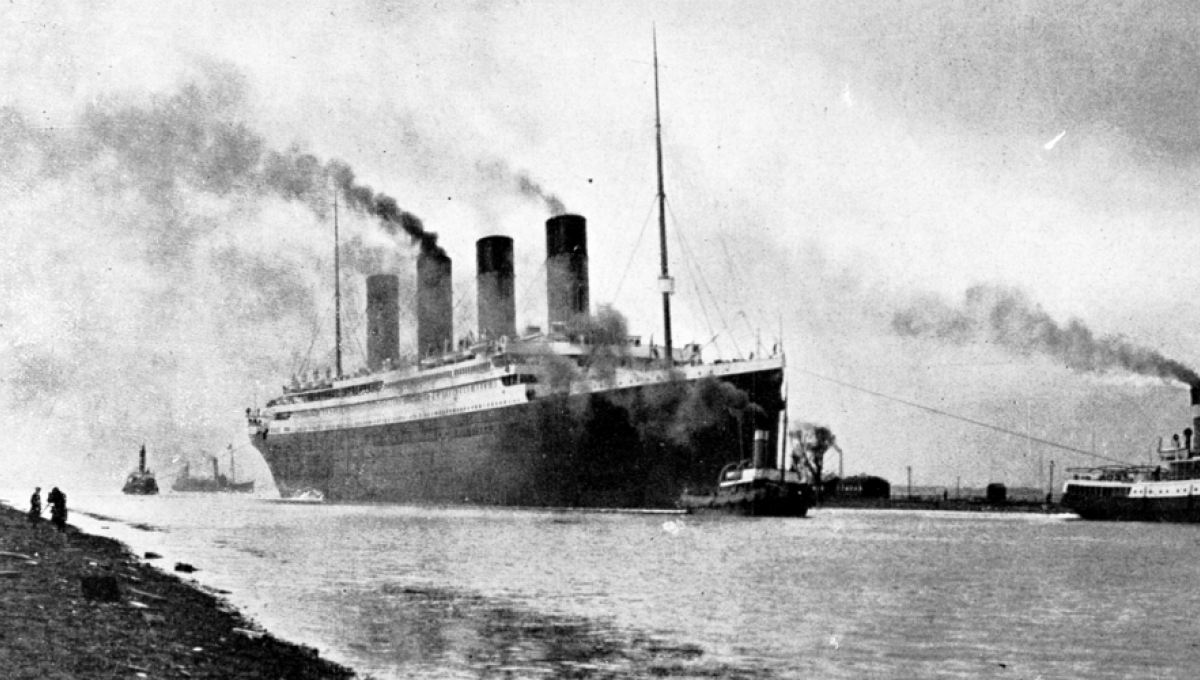

# **INTRODUCTION**

---

Dans ce premier notebook, nous avons créé un modèle qui prédit les passagers qui ont survécu au naufrage du Titanic en utilisant le machine learning. Les résultats obtenus dans ce notebook sont liés à une compétition Kaggle [ *(plus de détails ici)*](https://www.kaggle.com/c/titanic). À travers ce notebook vous pourrez voir le cheminement de notre analyse ainsi que son aboutissement: notre solution. 

#  **INITIALISATION**


---


*(à recharger à chaque connexion)*

## **Import**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

## **Data**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

# train_data est la data sur laquelle figure 891 passagers. 
# Cette liste nous dit si les passagers ont survécut ou non (0: il est mort, 1: il est vivant)
train_data = pd.read_csv("/content/drive/My Drive/kaggle/Titanic/train.csv")

# test_data est la data sur laquelle figure la liste des 418 passagers restants.
# Cette liste ne nous dit pas si ces passagers ont survécut (Pas de collone Survived).
# C'est à nous de trouver si les passagers de cette liste ont survécut.
test_data = pd.read_csv("/content/drive/My Drive/kaggle/Titanic/test.csv")

print(train_data)

Mounted at /content/drive
     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]


## **Visualisation**

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.shape
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

*On peut donc dire qu'il y 12 caracteristiques pour chaque passager.*
* PassengerId, Survived, Pclass, Name, Sex, Age, SibSp,Parch, Ticket, Fare, Cabin, Embarked

In [5]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#  **ANALYSE** 


---



D'abord, on fait un heatmap pour visualiser les relations entre les variables.

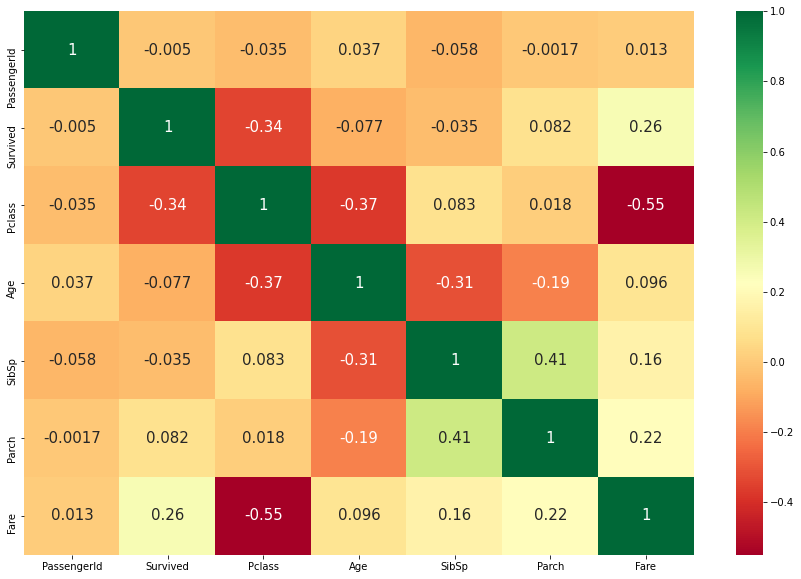

In [6]:
t = train_data.copy()
plt.figure(figsize=(15, 10))
sns.heatmap(t.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

On regarde où on voit une relation (où les cases sont plus vertes). 


Enfin et pour avoir une idée de la distribution de chaque variable de la data, on affiche ici les graphiques de chacune d'entre elles en fonction du PassengerId.

     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]


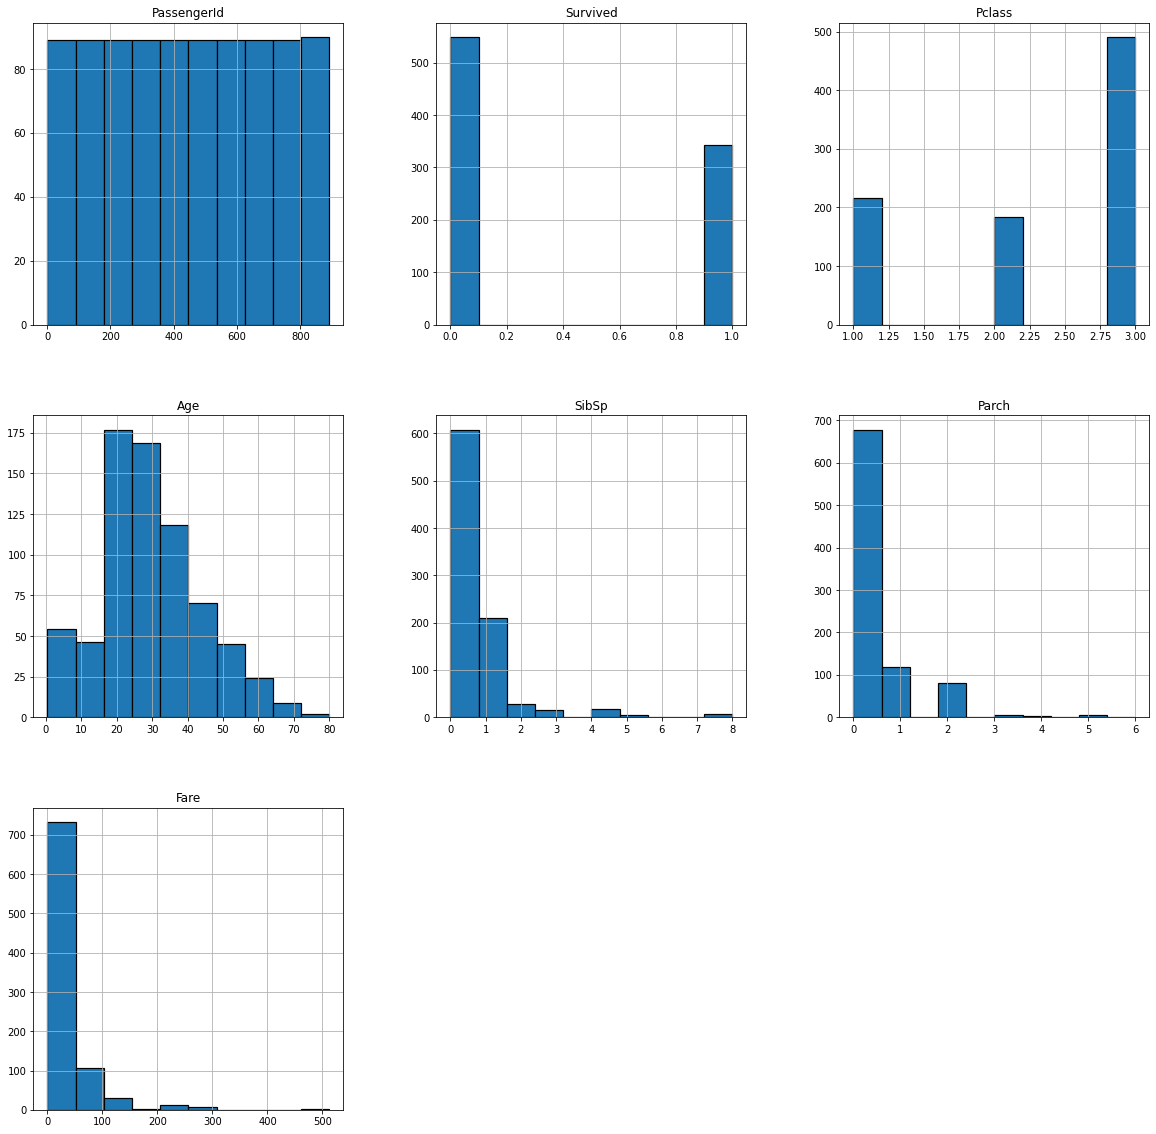

In [7]:
train_data.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));
train_data.describe()
print(train_data)

## SibSp et Parch

Les variables que nous allons analyser sont tout d'abord 'SibSp' (frères, soeurs ou conjoint(e)s à bord du bateau) et 'Parch' (parents ou enfants à bord du bateau).

On voit qu'il y avait 891 personnes sur le bateau et toutes les cases des variables SibSp et Parch sont remplies. De plus, d'après les lignes min et max, ces personnes avaient entre 0 et 8 SibSp, et entre 0 et 6 Parch.

D'après les graphiques, les variables SibSp et Parch sont en hausse entre 0 et 1.

On va donc les étudier pour voir s'il y a un lien entre celles-ci et le taux de survie.


### Pourcentage

In [8]:
# Psibsp et Pparch permettent de localiser seulement les personnes ayant survécu et ayant comme donnée 1 ou plus.
Psibsp = train_data.loc[train_data.SibSp >= 1]['Survived']
Pparch = train_data.loc[train_data.Parch >= 1]['Survived']

# On calcule ensuite le pourcentage de survie et on l'affiche.
rate_Psibsp = sum(Psibsp)/len(Psibsp)
print("% of people who have sib or spouses who survived:", rate_Psibsp)

rate_Pparch = sum(Pparch)/len(Pparch)
print("% of people who have Parch who survived:", rate_Pparch)

% of people who have sib or spouses who survived: 0.4664310954063604
% of people who have Parch who survived: 0.5117370892018779


Le % de personnes ayant plus d'un sibSp et ayant survécu est de 0.46643, puis celles ayant plus d'un Parch de 0.51174

In [9]:
# Psibsp et Pparch permettent de localiser seulement les personnes ayant survécu et ayant comme donnée 0.
Psibsp = train_data.loc[train_data.SibSp == 0]['Survived']
Pparch = train_data.loc[train_data.Parch == 0]['Survived']

# On calcule ensuite le pourcentage de survie et on l'affiche.
rate_Psibsp = sum(Psibsp)/len(Psibsp)
print("% of people who don't have sib or spouses who survived:", rate_Psibsp)

rate_Pparch = sum(Pparch)/len(Pparch)
print("% of people who have Parch who survived:", rate_Pparch)

% of people who don't have sib or spouses who survived: 0.34539473684210525
% of people who have Parch who survived: 0.34365781710914456


Le % de personnes ayant 0 sibSp et ayant survécu est de 0.34539, puis celles ayant 0 Parch de 0.34366

Les pourcentages de survie montrent que les personnes n'ayant pas de SibSp ou de Parch ont moins survécu (environ 34%) alors que celles en ayant au moins un ont survécu à hauteur d'environ 49%.

Cela pourrait s'expliquer par le nombre de personnes ayant des SibSp ou Parch et le nbre n'en n'ayant pas.


In [10]:
def nb_without_sibsp(data):
  # variable locale qui va permettre l'incrémentation
  Sibsp = 0
  # on va faire une boucle sur ses données et incrémenter d'un Sibsp lorsque la donnée est 0.
  for s in (data.SibSp):
    if(s == 0):
        Sibsp = Sibsp+1
  return Sibsp;

def nb_without_parch(data):
  # variable locale qui va permettre l'incrémentation
  Parch = 0
   # on va faire une boucle sur ses données et incrémenter d'un Parch lorsque la donnée est 0.
  for p in (data.Parch):
    if(p == 0):
        Parch = Parch+1
  return Parch

print(nb_without_sibsp(train_data))
print(nb_without_parch(train_data))


608
678


Il n'y a que 283 personnes seulement ayant 1 ou plus d'1 SibSp (891-608=283), et seulement 213 ayant 1 ou plus d'1 Parch (891-678=213).

En effet, cela représente 1/3 des personnes que nous allons étudier.


### Diagramme

Ensuite, on peut faire la supposition suivante :

- les jeunes personnes ayant des SibSp ont des frères ou soeurs plutot qu'un(e) conjoint(e) et ainsi,
- les personnes plus agées auraient un(e) conjoint(e).
- les jeunes personnes ayant des Parch auraient des parents plutot que des enfants,
- les personnes plus agées auraient des enfants.

On suppose donc que les personnes plus agées ayant des SibSp ou des Parch ont peut-être moins survécu car ont préféré les sauver (leurs enfants ou conjoints) par exemple.

Alors on va étudier les variables SibSp et Parch des personnes ayant survécu en fonction de leur age. On enlève donc les lignes où l'age n'est pas renseigné (on constate qu'il n'y a que 714 données dans la colonne 'Age').


In [11]:
train_data_sp = train_data.copy()
train_data_sp.dropna(subset=['Age'],inplace= True)
train_data_sp.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,259.119524,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


On se retrouve bien avec 714 lignes par colonne. On vérifie ensuite s'il n'y a pas trop de perte de données sur les variables SibSp et Parch

In [12]:
print(nb_without_sibsp(train_data_sp))
print(nb_without_parch(train_data_sp))

471
521


On se retrouve avec 243 personnes ayant 1 ou plus d'1 SibSp (714-471=243), et 193 ayant 1 ou plus d'1 Parch (714-521=193).

Cela représente 1/3 des personnes sur le bateau. On peut donc continuer.


In [13]:
# Pour la variable SibSp
Psibsp = train_data_sp.loc[train_data_sp.SibSp >= 1][train_data_sp.Age > 25]['Survived']
rate_Psibsp = sum(Psibsp)/len(Psibsp)
print("Plus de 25 ans",rate_Psibsp)

Psibsp = train_data_sp.loc[train_data_sp.SibSp >= 1][train_data_sp.Age <= 25]['Survived']
rate_Psibsp = sum(Psibsp)/len(Psibsp)
print("Moins de 25 ans",rate_Psibsp)


# Pour la variable Parch
Pparch = train_data_sp.loc[train_data_sp.Parch >= 1][train_data_sp.Age > 25]['Survived']
rate_Pparch = sum(Pparch)/len(Pparch)
print("Plus de 25 ans",rate_Pparch)

Pparch = train_data_sp.loc[train_data_sp.Parch >= 1][train_data_sp.Age <= 25]['Survived']
rate_Pparch = sum(Pparch)/len(Pparch)
print("Moins de 25 ans",rate_Pparch)

Plus de 25 ans 0.472
Moins de 25 ans 0.4745762711864407
Plus de 25 ans 0.46153846153846156
Moins de 25 ans 0.591304347826087


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


On constate donc que le taux de survie des personnes ayant des SibSp ne dépend pas de l'age car dans les 2 cas, le pourcentage est d'environ 47%. Alors que pour la variable Parch, on constate une différence entre les personnes les plus agées (qui ont moins survécu) que pour les plus jeunes. (46% contre 59%).

### Conclusion

L'hypothèse se trouve donc fausse pour la variable Sibsp mais peut être discutée pour la variable Parch.

## **Sex** 

Nous savons que le Genre influe sur la survie car c'est une piste donnée lors des explications de ce challenge d'apprentissage. Nous allons le vérifier.

### Pourcentage

In [14]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

# On constate ici que sur le modèle des 891 passagers de train_data,
# les femmes ont survécu en majorité.

% of women who survived: 0.7420382165605095


In [15]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

# On constate ici que sur le modèle des 891 passagers de train_data, 
# les hommes sont morts en majorité.

% of men who survived: 0.18890814558058924


Ainsi on en déduit que le Genre est déterminant pour définir qui de nos 418 autres passagers ont survécu.
La data gender_submission (toutes les femmes ont survécu et tous les hommes sont morts) donne un score de 0.76555/1

## **Cabin**

### Tri-data

In [16]:
data_light_cabin_number = train_data.copy()
data_light_cabin_number.drop(['Pclass','Name','Sex','Age','SibSp','Ticket','Fare','Embarked','Parch'], axis=1)
data_light2_cabin_number=data_light_cabin_number.dropna()
data_light2_cabin_number.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [17]:
CabinA = []
CabinB = []
CabinC = []
CabinD = []
CabinE = []
CabinF = []
CabinG = []
NoCabin = []

for i in range(891):
  if (type(train_data.Cabin[i])== float):
    train_data.Cabin[i]='No'

for i in range(891):
  if ((train_data.Cabin[i].find('A')>-1)):
    CabinA.append(1)
    CabinB.append(0)
    CabinC.append(0)
    CabinD.append(0)
    CabinE.append(0)
    CabinF.append(0)
    CabinG.append(0)
    NoCabin.append(0)
  elif ((train_data.Cabin[i].find('B')>-1)):
    CabinA.append(0)
    CabinB.append(1)
    CabinC.append(0)
    CabinD.append(0)
    CabinE.append(0)
    CabinF.append(0)
    CabinG.append(0)
    NoCabin.append(0)
  elif ((train_data.Cabin[i].find('C')>-1)):
    CabinA.append(0)
    CabinB.append(0)
    CabinC.append(1)
    CabinD.append(0)
    CabinE.append(0)
    CabinF.append(0)
    CabinG.append(0)
    NoCabin.append(0)
  elif ((train_data.Cabin[i].find('D')>-1)):
    CabinA.append(0)
    CabinB.append(0)
    CabinC.append(0)
    CabinD.append(1)
    CabinE.append(0)
    CabinF.append(0)
    CabinG.append(0)
    NoCabin.append(0)
  elif ((train_data.Cabin[i].find('E')>-1)):
    CabinA.append(0)
    CabinB.append(0)
    CabinC.append(0)
    CabinD.append(0)
    CabinE.append(1)
    CabinF.append(0)
    CabinG.append(0)
    NoCabin.append(0)
  elif ((train_data.Cabin[i].find('F')>-1)):
    CabinA.append(0)
    CabinB.append(0)
    CabinC.append(0)
    CabinD.append(0)
    CabinE.append(0)
    CabinF.append(1)
    CabinG.append(0)
    NoCabin.append(0)
  elif ((train_data.Cabin[i].find('G')>-1)):
    CabinA.append(0)
    CabinB.append(0)
    CabinC.append(0)
    CabinD.append(0)
    CabinE.append(0)
    CabinF.append(0)
    CabinG.append(1)
    NoCabin.append(0)
  elif ((train_data.Cabin[i].find('No')>-1)):
    CabinA.append(0)
    CabinB.append(0)
    CabinC.append(0)
    CabinD.append(0)
    CabinE.append(0)
    CabinF.append(0)
    CabinG.append(0)
    NoCabin.append(1)
  else :
    CabinA.append(0)
    CabinB.append(0)
    CabinC.append(0)
    CabinD.append(0)
    CabinE.append(0)
    CabinF.append(0)
    CabinG.append(0)
    NoCabin.append(1)
  

train_data['Cabin A'] = CabinA
train_data['Cabin B'] = CabinB
train_data['Cabin C'] = CabinC
train_data['Cabin D'] = CabinD
train_data['Cabin E'] = CabinE
train_data['Cabin F'] = CabinF
train_data['Cabin G'] = CabinG
train_data['NoCabin'] = NoCabin

train_data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin A,Cabin B,Cabin C,Cabin D,Cabin E,Cabin F,Cabin G,NoCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,No,S,0,0,0,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,1,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,No,S,0,0,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,No,S,0,0,0,0,0,0,0,1


In [18]:
for cabin in train_data.Cabin:
  print(type(cabin), cabin)

<class 'str'> No
<class 'str'> C85
<class 'str'> No
<class 'str'> C123
<class 'str'> No
<class 'str'> No
<class 'str'> E46
<class 'str'> No
<class 'str'> No
<class 'str'> No
<class 'str'> G6
<class 'str'> C103
<class 'str'> No
<class 'str'> No
<class 'str'> No
<class 'str'> No
<class 'str'> No
<class 'str'> No
<class 'str'> No
<class 'str'> No
<class 'str'> No
<class 'str'> D56
<class 'str'> No
<class 'str'> A6
<class 'str'> No
<class 'str'> No
<class 'str'> No
<class 'str'> C23 C25 C27
<class 'str'> No
<class 'str'> No
<class 'str'> No
<class 'str'> B78
<class 'str'> No
<class 'str'> No
<class 'str'> No
<class 'str'> No
<class 'str'> No
<class 'str'> No
<class 'str'> No
<class 'str'> No
<class 'str'> No
<class 'str'> No
<class 'str'> No
<class 'str'> No
<class 'str'> No
<class 'str'> No
<class 'str'> No
<class 'str'> No
<class 'str'> No
<class 'str'> No
<class 'str'> No
<class 'str'> No
<class 'str'> D33
<class 'str'> No
<class 'str'> B30
<class 'str'> C52
<class 'str'> No
<class 'str

In [19]:
for i in range(418):
  if (type(test_data.Cabin[i])== float):
    test_data.Cabin[i]='No'


CabinA = []
CabinB = []
CabinC = []
CabinD = []
CabinE = []
CabinF = []
CabinG = []
NoCabin = []


for i in range(418):
  if ((test_data.Cabin[i].find('A')>-1)):
    CabinA.append(1)
    CabinB.append(0)
    CabinC.append(0)
    CabinD.append(0)
    CabinE.append(0)
    CabinF.append(0)
    CabinG.append(0)
    NoCabin.append(0)
  elif ((test_data.Cabin[i].find('B')>-1)):
    CabinA.append(0)
    CabinB.append(1)
    CabinC.append(0)
    CabinD.append(0)
    CabinE.append(0)
    CabinF.append(0)
    CabinG.append(0)
    NoCabin.append(0)
  elif ((test_data.Cabin[i].find('C')>-1)):
    CabinA.append(0)
    CabinB.append(0)
    CabinC.append(1)
    CabinD.append(0)
    CabinE.append(0)
    CabinF.append(0)
    CabinG.append(0)
    NoCabin.append(0)
  elif ((test_data.Cabin[i].find('D')>-1)):
    CabinA.append(0)
    CabinB.append(0)
    CabinC.append(0)
    CabinD.append(1)
    CabinE.append(0)
    CabinF.append(0)
    CabinG.append(0)
    NoCabin.append(0)
  elif ((test_data.Cabin[i].find('E')>-1)):
    CabinA.append(0)
    CabinB.append(0)
    CabinC.append(0)
    CabinD.append(0)
    CabinE.append(1)
    CabinF.append(0)
    CabinG.append(0)
    NoCabin.append(0)
  elif ((test_data.Cabin[i].find('F')>-1)):
    CabinA.append(0)
    CabinB.append(0)
    CabinC.append(0)
    CabinD.append(0)
    CabinE.append(0)
    CabinF.append(1)
    CabinG.append(0)
    NoCabin.append(0)
  elif ((test_data.Cabin[i].find('G')>-1)):
    CabinA.append(0)
    CabinB.append(0)
    CabinC.append(0)
    CabinD.append(0)
    CabinE.append(0)
    CabinF.append(0)
    CabinG.append(1)
    NoCabin.append(0)
  elif ((test_data.Cabin[i].find('No')>-1)):
    CabinA.append(0)
    CabinB.append(0)
    CabinC.append(0)
    CabinD.append(0)
    CabinE.append(0)
    CabinF.append(0)
    CabinG.append(0)
    NoCabin.append(1)
  else :
    CabinA.append(0)
    CabinB.append(0)
    CabinC.append(0)
    CabinD.append(0)
    CabinE.append(0)
    CabinF.append(0)
    CabinG.append(0)
    NoCabin.append(1)
  

test_data['Cabin A'] = CabinA
test_data['Cabin B'] = CabinB
test_data['Cabin C'] = CabinC
test_data['Cabin D'] = CabinD
test_data['Cabin E'] = CabinE
test_data['Cabin F'] = CabinF
test_data['Cabin G'] = CabinG
test_data['NoCabin'] = NoCabin

test_data.tail()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin A,Cabin B,Cabin C,Cabin D,Cabin E,Cabin F,Cabin G,NoCabin
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,No,S,0,0,0,0,0,0,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0,0,1,0,0,0,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,No,S,0,0,0,0,0,0,0,1
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,No,S,0,0,0,0,0,0,0,1
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,No,C,0,0,0,0,0,0,0,1


In [20]:
for cabin in test_data.Cabin:
  print(type(cabin), cabin)

<class 'str'> No
<class 'str'> No
<class 'str'> No
<class 'str'> No
<class 'str'> No
<class 'str'> No
<class 'str'> No
<class 'str'> No
<class 'str'> No
<class 'str'> No
<class 'str'> No
<class 'str'> No
<class 'str'> B45
<class 'str'> No
<class 'str'> E31
<class 'str'> No
<class 'str'> No
<class 'str'> No
<class 'str'> No
<class 'str'> No
<class 'str'> No
<class 'str'> No
<class 'str'> No
<class 'str'> No
<class 'str'> B57 B59 B63 B66
<class 'str'> No
<class 'str'> B36
<class 'str'> No
<class 'str'> A21
<class 'str'> No
<class 'str'> No
<class 'str'> No
<class 'str'> No
<class 'str'> No
<class 'str'> C78
<class 'str'> No
<class 'str'> No
<class 'str'> No
<class 'str'> No
<class 'str'> No
<class 'str'> No
<class 'str'> D34
<class 'str'> No
<class 'str'> No
<class 'str'> D19
<class 'str'> No
<class 'str'> A9
<class 'str'> No
<class 'str'> D15
<class 'str'> No
<class 'str'> C31
<class 'str'> No
<class 'str'> No
<class 'str'> C23 C25 C27
<class 'str'> No
<class 'str'> No
<class 'str'> No


### Rate

In [21]:
A=data_light2_cabin_number[data_light2_cabin_number["Cabin"].str.contains("A")]["Survived"]
Rate_Cabin_A = sum(A)/len(A)
print("% of Cabin A survived:", Rate_Cabin_A)

B=data_light2_cabin_number[data_light2_cabin_number["Cabin"].str.contains("B")]["Survived"]
Rate_Cabin_B = sum(B)/len(B)
print("% of Cabin B survived:", Rate_Cabin_B)


C=data_light2_cabin_number[data_light2_cabin_number["Cabin"].str.contains("C")]["Survived"]
Rate_Cabin_C = sum(C)/len(C)
print("% of Cabin C survived:", Rate_Cabin_C)

D=data_light2_cabin_number[data_light2_cabin_number["Cabin"].str.contains("D")]["Survived"]
Rate_Cabin_D = sum(D)/len(D)
print("% of Cabin D survived:", Rate_Cabin_D)

E=data_light2_cabin_number[data_light2_cabin_number["Cabin"].str.contains("E")]["Survived"]
Rate_Cabin_E = sum(E)/len(E)
print("% of Cabin E survived:", Rate_Cabin_E)

F=data_light2_cabin_number[data_light2_cabin_number["Cabin"].str.contains("F")]["Survived"]
Rate_Cabin_F = sum(F)/len(F)
print("% of Cabin F survived:", Rate_Cabin_F)

G=data_light2_cabin_number[data_light2_cabin_number["Cabin"].str.contains("G")]["Survived"]
Rate_Cabin_G = sum(G)/len(G)
print("% of Cabin G survived:", Rate_Cabin_G)

NoCabin= train_data[train_data["Cabin"].str.contains("No")]["Survived"]
Rate_Cabin_NoCabin = sum(NoCabin)/len(NoCabin)
print("% of NoCabin survived:", Rate_Cabin_NoCabin)


% of Cabin A survived: 0.5833333333333334
% of Cabin B survived: 0.7441860465116279
% of Cabin C survived: 0.5882352941176471
% of Cabin D survived: 0.7419354838709677
% of Cabin E survived: 0.7333333333333333
% of Cabin F survived: 0.6363636363636364
% of Cabin G survived: 0.2857142857142857
% of NoCabin survived: 0.29985443959243085


Ici, on voit que les cabines B, D et E sont celles qui ont le meilleur taux de survie. 

In [22]:
c=0
for cabin in data_light_cabin_number.Cabin:
    if type(cabin) == str  :
      c=c+1
print(c)

204


Cependant, seulement 204 passagers avaient une cabine.

### Diagramme

<BarContainer object of 8 artists>

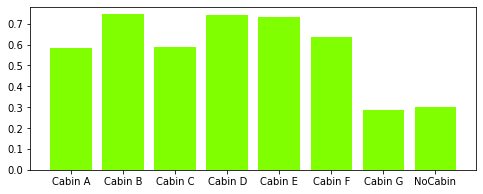

In [23]:
data = {'Cabin A': Rate_Cabin_A, 'Cabin B': Rate_Cabin_B, 'Cabin C': Rate_Cabin_C, 'Cabin D' :Rate_Cabin_D , 'Cabin E' :Rate_Cabin_E , 'Cabin F' :Rate_Cabin_F , 'Cabin G' :Rate_Cabin_G  , 'NoCabin' :Rate_Cabin_NoCabin  }
names_Cabin = list(data.keys())
values = list(data.values())

fig, axs= plt.subplots( figsize=(8, 3), sharey=True)
axs.bar(names_Cabin, values, color='chartreuse')

### Conclusion

-> La cabine a aussi une influence sur la survie. Plus de 70% de survie pour les voyageurs en Cabines B, D et E. Néamoins ces stats s'appuient sur seulement 204 Cabines de train_data. Les autres étant NaN. Cette donnée est alors à utiliser avec parcimonie.

## **Age**

On s'intéresse maintenant à l'age des passagers.

### Tri-data

In [24]:
data_light_A = train_data.copy()
data_light_A.drop(['PassengerId','Name','Ticket','Pclass', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'], axis=1)
data_light_A.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin A,Cabin B,Cabin C,Cabin D,Cabin E,Cabin F,Cabin G,NoCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,No,S,0,0,0,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,1,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,No,S,0,0,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,No,S,0,0,0,0,0,0,0,1


In [25]:
data_light_A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
 12  Cabin A      891 non-null    int64  
 13  Cabin B      891 non-null    int64  
 14  Cabin C      891 non-null    int64  
 15  Cabin D      891 non-null    int64  
 16  Cabin E      891 non-null    int64  
 17  Cabin F      891 non-null    int64  
 18  Cabin G      891 non-null    int64  
 19  NoCabin 

On remarque qu'il manque 117 données pour l'âge le reste est complet. 

In [26]:
data_light_Age = data_light_A.fillna(data_light_A['Age'].mean())
data_light_Age.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin A,Cabin B,Cabin C,Cabin D,Cabin E,Cabin F,Cabin G,NoCabin
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.016835,0.052750,0.066218,0.037037,0.037037,0.013468,0.004489,0.772166
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.128725,0.223659,0.248802,0.188959,0.188959,0.115332,0.066890,0.419670
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Par défaut une valeur manquante est égale la moyenne des ages.

### Diagramme

Text(0.5, 1.0, 'Répartition des ages')

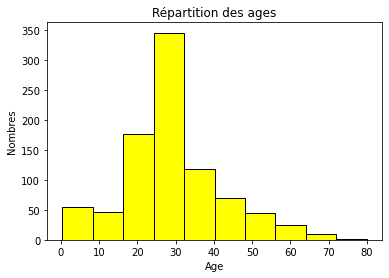

In [27]:
plt.hist(data_light_Age.Age, color = 'yellow', edgecolor = 'black')
plt.xlabel('Age', color="black")
plt.ylabel('Nombres', color="black")
plt.title('Répartition des ages', color="black")

On peut dire que la majorité des passagers ont environ entre 18 ans et 40 ans.

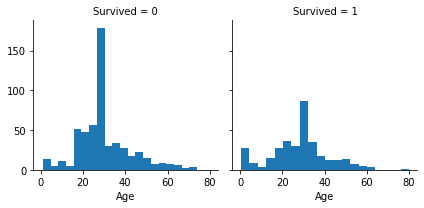

In [28]:
grid = sns.FacetGrid(data_light_Age, col='Survived')
grid.map(plt.hist, 'Age', bins=20)

Aucune tranche d'âge se distingue réellement.

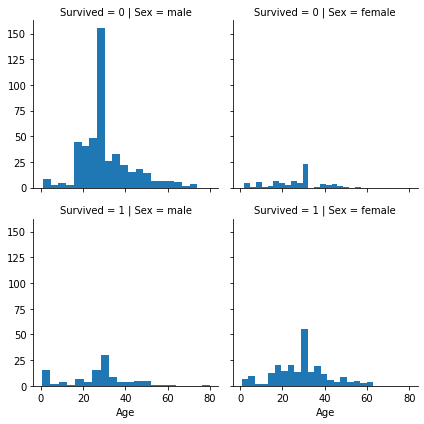

In [29]:
grid = sns.FacetGrid(data_light_Age, row='Survived', col='Sex')
grid.map(plt.hist, 'Age', alpha=1, bins=20)

### Conclusion

Même conclusion... 
On peut dire que:
1. Les enfants (**<5**) => **SUIVIVED=1**.
2. Les personnes agées (**>75**) => **SUIVIVED=1**.

mais ça reste très peu fiable.

## **Title**

Nous nous sommes ensuite intéressés au titre des personnes à bord du bateau. En effet, le 'Name' des passagers se constitue de leur nom de famille, d'un titre (Mr, Mrs, etc), puis de leur prénom. Ainsi, nous allons voir si le titre des passagers a un impact sur la survie.

### Tri-data

In [30]:
data_light_Title = train_data.copy()
data_light_Title.drop(['PassengerId','Ticket','Pclass', 'SibSp','Sex','Age', 'Parch', 'Fare', 'Cabin', 'Embarked'], axis=1)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin A,Cabin B,Cabin C,Cabin D,Cabin E,Cabin F,Cabin G,NoCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,No,S,0,0,0,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,1,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,No,S,0,0,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,No,S,0,0,0,0,0,0,0,1


In [31]:
statut = []
for i in range(891):
      debut = (data_light_Title.Name[i]).index(", ") + 2
      fin = (data_light_Title.Name[i]).index(". ")
      nvStatut = data_light_Title.Name[i][debut:fin]
      if ((nvStatut in statut)==0):
        statut.append(nvStatut)
print(statut)

['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms', 'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess', 'Jonkheer']


On récupère tout les titres de passagers qui étaient présents sur le Titanic. Les plus fréquents sont 'Mr', 'Mrs', 'Miss', 'Master'.
On crée ensuite une nouvelle colonne dans train_data et dans test_data contenant le titre seulement, ainsi qu'une colonne pour chaque titre les plus fréquents contenant la valeur 1 s'il convient.

In [32]:
title = []
for i in range(891):
  if ((data_light_Title.Name[i].find(', Mrs')>-1)):
    title.append('Mrs')
  elif ((data_light_Title.Name[i].find(', Mr')>-1)):
    title.append('Mr')
  else:
    for j in range(len(statut)):
      if ((data_light_Title.Name[i].find(', ' + statut[j])>-1) and (statut[j]!=', Mr') and (statut[j]!=', Mrs')):
        title.append(statut[j])

train_data['Title'] = title
data_light_Title['Title'] = title
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin A,Cabin B,Cabin C,Cabin D,Cabin E,Cabin F,Cabin G,NoCabin,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,No,S,0,0,0,0,0,0,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,1,0,0,0,0,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,No,S,0,0,0,0,0,0,0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,0,0,0,0,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,No,S,0,0,0,0,0,0,0,1,Mr


In [33]:
Mr = []

for i in range(891):
  if ((data_light_Title.Name[i].find(', Mr')>-1)and (data_light_Title.Name[i].find(', Mrs')==-1)):
    Mr.append(1)
  else:
    Mr.append(0)

Mrs = []

for i in range(891):
  if ((data_light_Title.Name[i].find(', Mrs')>-1)):
    Mrs.append(1)
  else:
    Mrs.append(0)

Master = []

for i in range(891):
  if ((data_light_Title.Name[i].find(', Master')>-1)):
    Master.append(1)
  else:
    Master.append(0)
  
Miss = []

for i in range(891):
  if ((data_light_Title.Name[i].find(', Miss')>-1)):
    Miss.append(1)
  else:
    Miss.append(0)

train_data['Mr'] = Mr
train_data['Mrs'] = Mrs
train_data['Master'] = Master
train_data['Miss'] = Miss
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
 12  Cabin A      891 non-null    int64  
 13  Cabin B      891 non-null    int64  
 14  Cabin C      891 non-null    int64  
 15  Cabin D      891 non-null    int64  
 16  Cabin E      891 non-null    int64  
 17  Cabin F      891 non-null    int64  
 18  Cabin G      891 non-null    int64  
 19  NoCabin 

In [34]:
title2 = []
for i in range(418):
  if ((test_data.Name[i].find(', Mrs')>-1)):
    title2.append('Mrs')
  elif ((test_data.Name[i].find(', Mr')>-1)):
    title2.append('Mr')
  else:
    for j in range(len(statut)):
      if ((test_data.Name[i].find(', ' + statut[j])>-1) and (statut[j]!=', Mr') and (statut[j]!=', Mrs')):
        title2.append(statut[j])

test_data['Title'] = title2   
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin A,Cabin B,Cabin C,Cabin D,Cabin E,Cabin F,Cabin G,NoCabin,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,No,Q,0,0,0,0,0,0,0,1,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,No,S,0,0,0,0,0,0,0,1,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,No,Q,0,0,0,0,0,0,0,1,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,No,S,0,0,0,0,0,0,0,1,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,No,S,0,0,0,0,0,0,0,1,Mrs


In [35]:
Mr = []

for i in range(418):
  if ((test_data.Name[i].find(', Mr')>-1)and (test_data.Name[i].find(', Mrs')==-1)):
    Mr.append(1)
  else:
    Mr.append(0)

Mrs = []

for i in range(418):
  if ((test_data.Name[i].find(', Mrs')>-1)):
    Mrs.append(1)
  else:
    Mrs.append(0)

Master = []

for i in range(418):
  if ((test_data.Name[i].find(', Master')>-1)):
    Master.append(1)
  else:
    Master.append(0)

  
Miss = []

for i in range(418):
  if ((test_data.Name[i].find(', Miss')>-1)):
    Miss.append(1)
  else:
    Miss.append(0)

test_data['Mr'] = Mr
test_data['Mrs'] = Mrs
test_data['Master'] = Master
test_data['Miss'] = Miss
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
 11  Cabin A      418 non-null    int64  
 12  Cabin B      418 non-null    int64  
 13  Cabin C      418 non-null    int64  
 14  Cabin D      418 non-null    int64  
 15  Cabin E      418 non-null    int64  
 16  Cabin F      418 non-null    int64  
 17  Cabin G      418 non-null    int64  
 18  NoCabin      418 non-null    int64  
 19  Title   

### Diagramme

Pour l'analyse, on affiche ici les titres en fonction de la survie.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


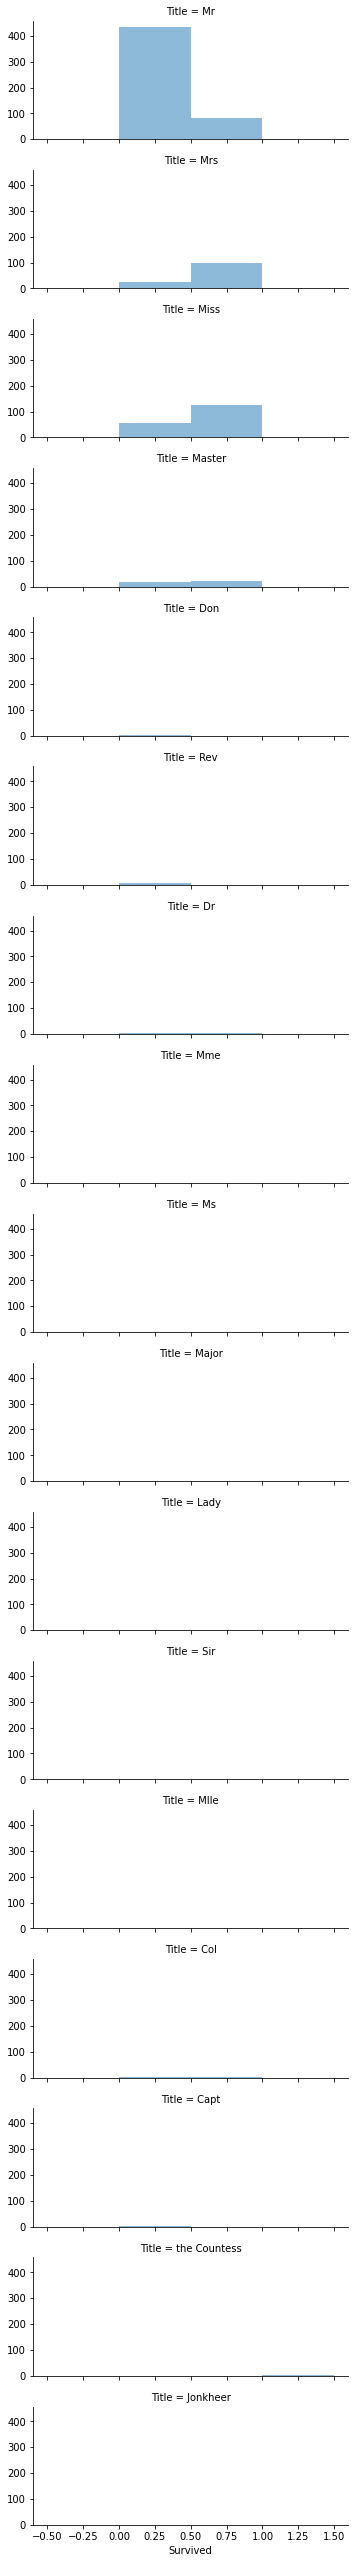

In [36]:
grid = sns.FacetGrid(data_light_Title, row='Title', size=2.1, aspect=2.4)
grid.map(plt.hist, 'Survived', alpha=.5, bins=2)

Les titres principaux à étudier plus en détail restent Mr, Mrs, Master, Miss. De plus:


*   Rev + Jonhkeer => survived(0)
*   Lady + Mlle + The countess => survived(1)

=> Confirmation de l'importance de la variable Sex.



### Rate

In [46]:
Mr=train_data[train_data["Name"].str.contains("Mr")]["Survived"]
rate_Mr = sum(Mr)/len(Mr)
print("% of Mr survived:", rate_Mr)

Master=train_data[train_data["Name"].str.contains("Master")]["Survived"]
rate_Master = sum(Master)/len(Master)
print("% of Master survived:", rate_Master)

Miss=train_data[train_data["Name"].str.contains("Miss")]["Survived"]
rate_Miss = sum(Miss)/len(Miss)
print("% of Miss survived:", rate_Miss)

Mrs=train_data[train_data["Name"].str.contains("Mrs")]["Survived"]
rate_Mrs = sum(Mrs)/len(Mrs)
print("% of Mrs survived:", rate_Mrs)

% of Mr survived: 0.28438948995363217
% of Master survived: 0.575
% of Miss survived: 0.6978021978021978
% of Mrs survived: 0.7906976744186046


On constate encore que les femmes ont plus survécu.
Voila une visualisation de ces resultats.

[0.28438948995363217, 0.575, 0.6978021978021978, 0.7906976744186046]


Text(0.5, 0.98, 'Categorical Plotting')

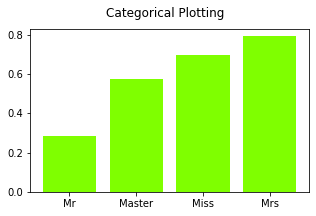

In [47]:
data = {'Mr': rate_Mr, 'Master': rate_Master, 'Miss': rate_Miss, 'Mrs': rate_Mrs }
names_2 = list(data.keys())
values_2 = list(data.values())

print(values_2)

fig, axs= plt.subplots( figsize=(5, 3), sharey=True)
axs.bar(names_2, values_2, color='chartreuse')

fig.suptitle('Categorical Plotting')

### Conclusion

Le titre, notamment avec la survie majoritaire des Madames et Mademoiselles, démontrent que c'est un élément à prendre en compte pour la random Forest.

## **Embarked**

### Tri-data

In [39]:
data_light_l = train_data.copy()
data_light_l.drop(['Pclass','Name','Sex','Age','SibSp','Ticket','Fare','Cabin','Parch'], axis=1)
data_light_loc=data_light_l.dropna()
data_light_loc.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin A,Cabin B,Cabin C,Cabin D,Cabin E,Cabin F,Cabin G,NoCabin,Title,Mr,Mrs,Master,Miss
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,No,S,0,0,0,0,0,0,0,1,Mr,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,1,0,0,0,0,0,Mrs,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,No,S,0,0,0,0,0,0,0,1,Miss,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,0,0,0,0,0,Mrs,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,No,S,0,0,0,0,0,0,0,1,Mr,1,0,0,0


### Pourcentage

In [40]:
embarked_Q = train_data.loc[train_data.Embarked == 'Q']["Survived"]
rate_embarked_Q = sum(embarked_Q)/len(embarked_Q)
print("% of Q who survived:", rate_embarked_Q)

embarked_S = train_data.loc[train_data.Embarked == 'S']["Survived"]
rate_embarked_S = sum(embarked_S)/len(embarked_S)
print("% of S who survived:", rate_embarked_S)


embarked_C = train_data.loc[train_data.Embarked == 'C']["Survived"]
rate_embarked_C = sum(embarked_C)/len(embarked_C)
print("% of C who survived:", rate_embarked_C)

% of Q who survived: 0.38961038961038963
% of S who survived: 0.33695652173913043
% of C who survived: 0.5535714285714286


On constate que les personnes ayant embarqué au port C ont plus survécu (55%).

### Diagramme

Text(0.5, 0.98, "Survie en fonction du port d'embarquement")

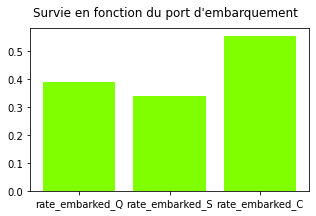

In [41]:
data = {'rate_embarked_Q': rate_embarked_Q, 'rate_embarked_S': rate_embarked_S, 'rate_embarked_C': rate_embarked_C }
names = list(data.keys())
values = list(data.values())

fig, axs= plt.subplots( figsize=(5, 3), sharey=True)
axs.bar(names, values, color='chartreuse')

fig.suptitle("Survie en fonction du port d'embarquement")

### Conclusion

Le port d'embarquement a donc une influence sur la survie. C'est un élement à conserver pour la Random Forest

#**RANDOM FOREST**

Les données que nous avons pris en compte dans la random forest sont : "Master", "Mr", "Mrs", "Miss","Embarked", "Pclass", "Sex","NoCabin".

In [42]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Master", "Mr", "Mrs", "Miss","Embarked", "Pclass", "Sex","NoCabin"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('/content/drive/My Drive/kaggle/Titanic/my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [43]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz

female = []
SCQ = []


for i in range(891):
  if (train_data.Embarked[i]=='S'):
    SCQ.append(0)
  elif (train_data.Embarked[i]=='Q'):
    SCQ.append(1)
  else:
    SCQ.append(2)

for i in range(891):
  if ((train_data.Sex[i].find('female')>-1)):
    female.append(1)
  else:
    female.append(0)

train_data["Female"] = female
train_data["Embarked SCQ"] = SCQ



dX = train_data[["Female","Master", "Mrs", "Miss","Mr", "Pclass", "Embarked SCQ"]]
dY = train_data["Survived"]

In [44]:
model2 = DecisionTreeClassifier()
model2.fit(dX, dY)
pd.DataFrame([model2.feature_importances_],columns=dX.columns )

,Female,Master,Mrs,Miss,Mr,Pclass,Embarked SCQ
0,0.049355,0.04384,0.004114,0.004625,0.631959,0.204191,0.061916


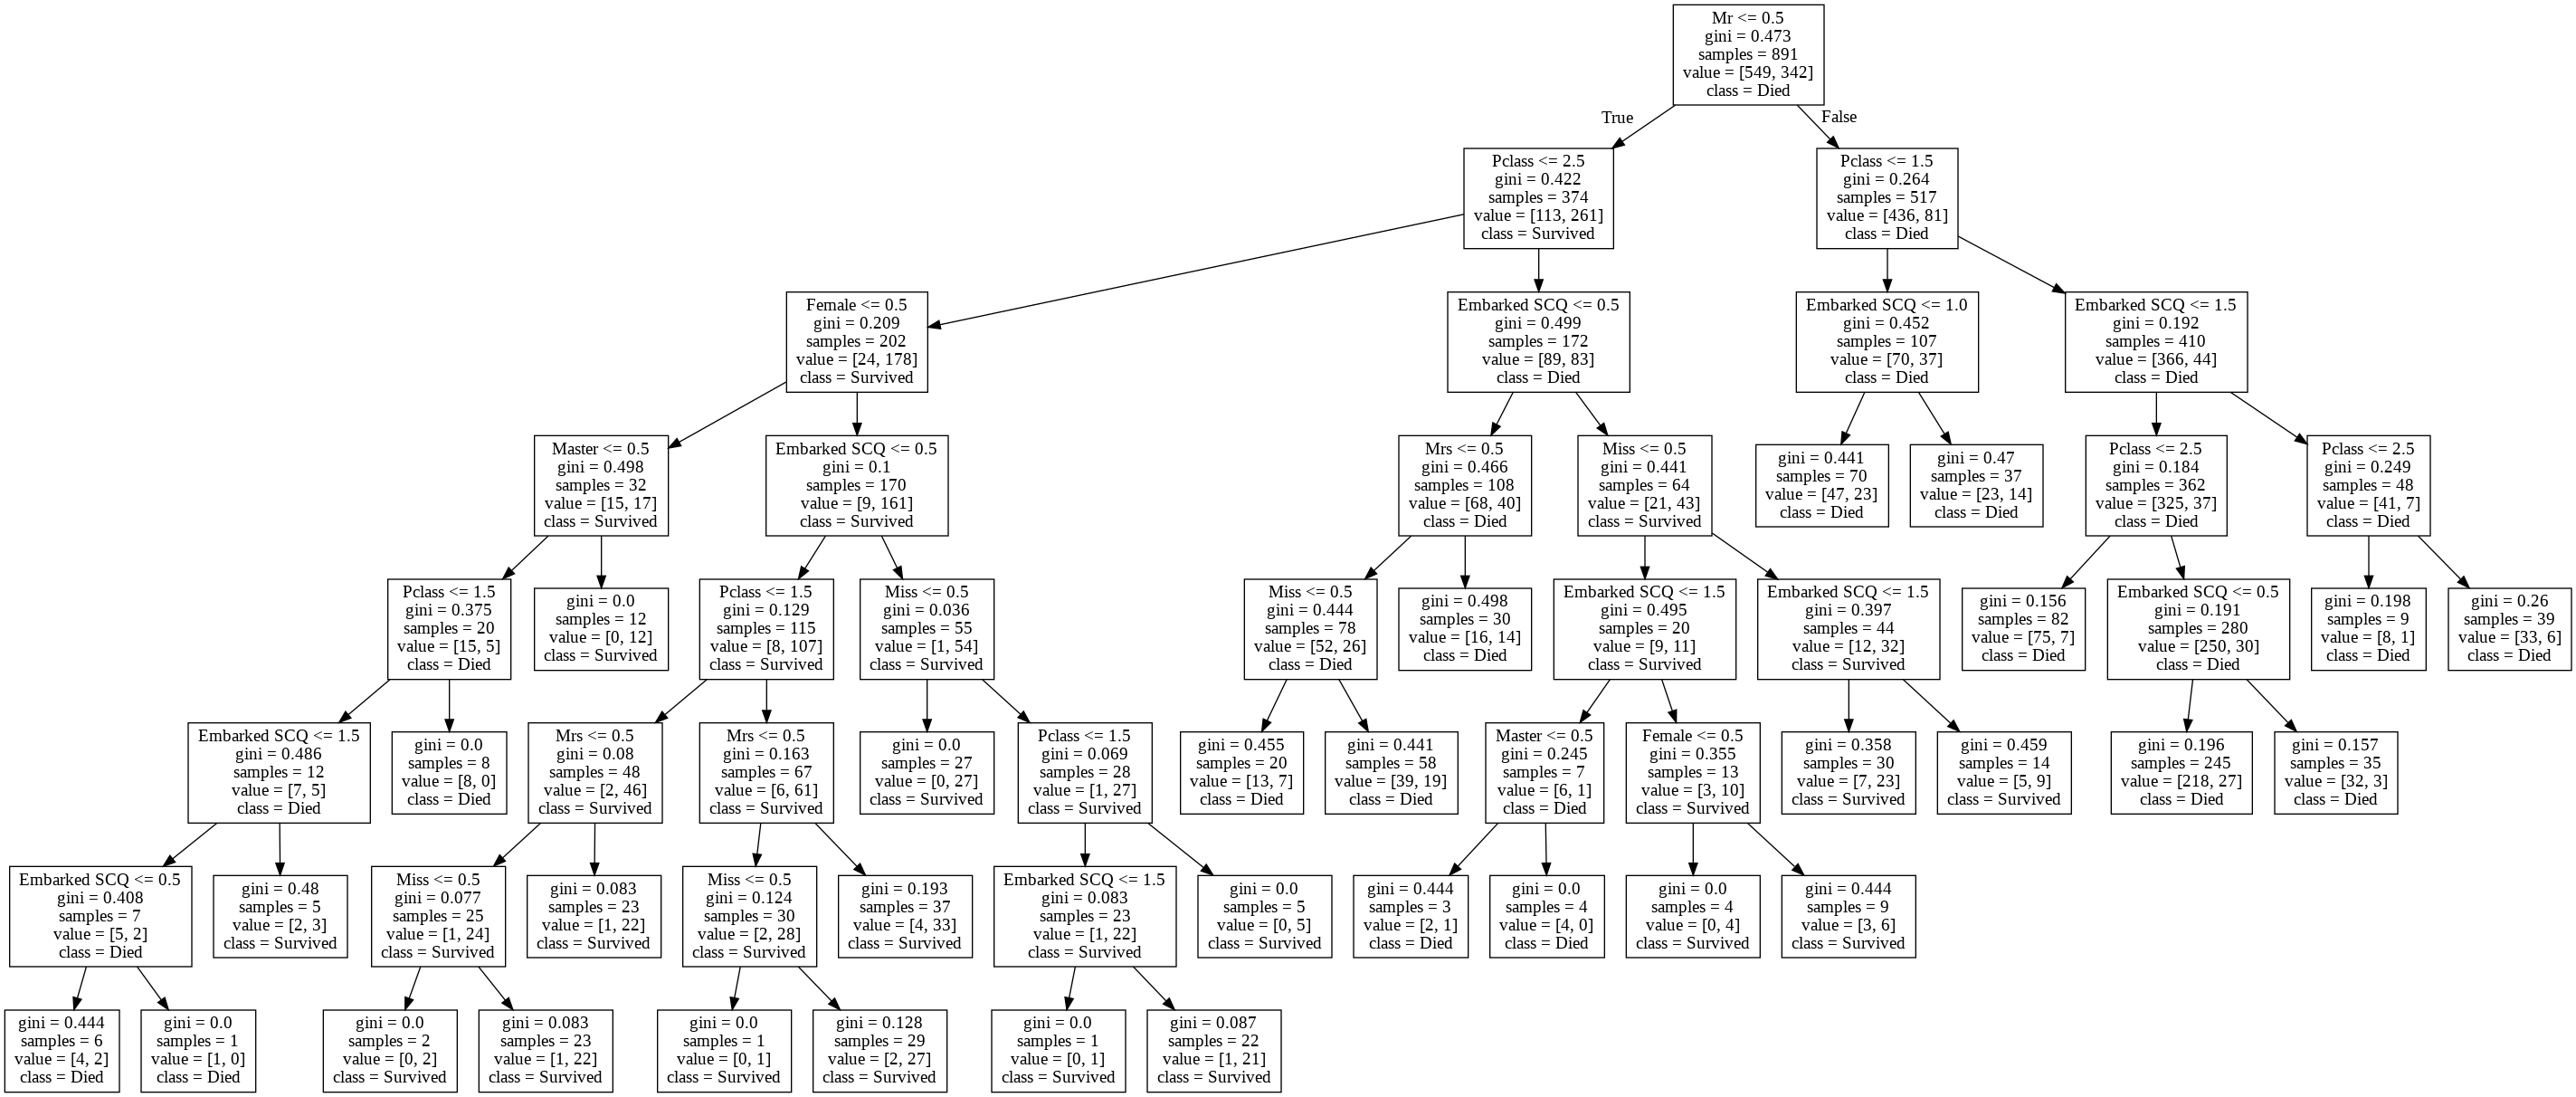

In [45]:
from sklearn import tree
import pydotplus
from IPython.display import Image

# Create DOT data
dot_data = tree.export_graphviz(model2, out_file=None, feature_names = dX.columns.tolist(),class_names=['Died','Survived'])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Arbre=Image(graph.create_png())
graph.write_png("/content/drive/My Drive/kaggle/Titanic/Arbre.png")

# Affiche arbre
Arbre

# **AUTRE**


*   Score finale: 0.79186/1
*   Classement: 1558/20973




___


Notebook réalisé dans le cadre de l'UE LIFPROJET, par Judith MILLET, Simon KLOPFENSTEIN et Lina ISMAIL.

___
